In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

0. Receive estimation of pupil characteristics from previos frame

In [6]:
original_image = cv2.imread("../test.png")

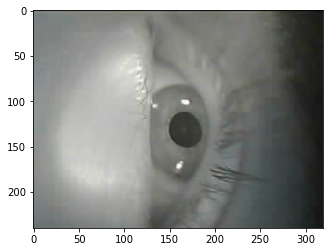

In [7]:
plt.imshow(original_image)

1. Crop ROI

In [8]:
cropped_image = original_image[20:,100:220]

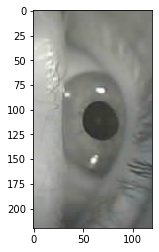

In [9]:
plt.imshow(cropped_image)

2. Haar-like feature detection

In [10]:
gray_image = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)


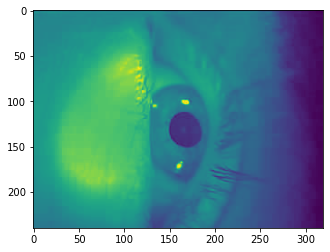

In [11]:
plt.imshow(gray_image)

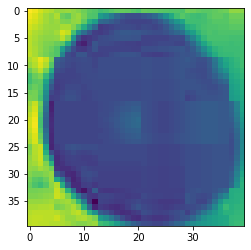

In [12]:
x = 111
y = 147
a = 40
ROI_image = gray_image[x:x+a,y:y+a]/255
plt.imshow(ROI_image)

In [13]:
plt.figure(figsize=(27,27))
plt.imshow(ROI_image, cmap='gray')

height, width = ROI_image.shape
for y in range(height):
    for x in range(width):
        plt.annotate(str(round(ROI_image[y, x],2)), xy=(x, y), color='red', fontsize=9, ha='center', va='center')

# Hide axis ticks and labels for a cleaner look
plt.xticks([])
plt.yticks([])

plt.savefig("ImageWithPixelValues.png")

Error in callback <function flush_figures at 0x0000022EBBCF03A0> (for post_execute):


KeyboardInterrupt: 

In [14]:
def vertical_line_feature(shape):
    # Ensure the shape has odd dimensions for symmetry
    if shape[0] % 2 == 0 or shape[1] % 2 == 0:
        raise ValueError("Shape dimensions must be odd for symmetry.")

    # Create an array to hold the custom vertical line feature
    feature = np.zeros(shape, dtype=int)

    # Define the width of the black region
    side_width = shape[1] // 4
    middle_width = 2 * side_width
   

    # Set values for the white and black regions
    feature[:, :side_width] = -1
    feature[:, side_width:side_width+middle_width] = 1
    feature[:, side_width+middle_width:] = -1

    return feature

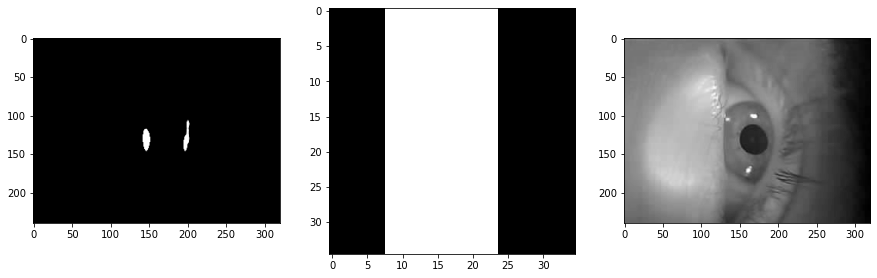

In [38]:
# Define the size of the custom Haar-like line feature
custom_shape = (35,35)  # Customize the shape as per your requirement

# Create the custom Haar-like line feature
custom_line_feature = vertical_line_feature(custom_shape)

new_image = cv2.filter2D(gray_image,-1,custom_line_feature)

fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(new_image,cmap="gray")
ax[1].imshow(custom_line_feature,cmap="gray")
ax[2].imshow(gray_image,cmap="gray")
